<a href="https://colab.research.google.com/github/DmitryMaximus/Robot/blob/master/Financial_Pairs_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install arch
import sklearn as sk
import pandas as pd
from random import gauss
from random import seed
from matplotlib import pyplot as  plt
import os
import sys
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl

     |████████████████████████████████| 706kB 2.9MB/s 


In [0]:
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [0]:
data=pd.read_excel("https://github.com/DmitryMaximus/Robot/blob/master/Data_y.xlsx?raw=true")
data_1=pd.read_excel("https://github.com/DmitryMaximus/Robot/blob/master/Data_xy.xlsx?raw=true")
data.describe()

,AUDCAD,AUDCHF,AUDJPY,AIDNZD,AUDUSD,CADCHF,CADJPY,EURAUD,EURCAD,GBPAUD,GBPCAD,NZDCAD,USDCAD
AUDCAD,1.000000,0.701414,0.666862,0.807171,0.676063,0.720001,0.710082,0.777111,0.731138,0.707700,0.699070,0.710438,0.655734
AUDCHF,0.701414,1.000000,0.880352,0.791140,0.885259,0.742898,0.697505,0.213513,0.475564,0.188183,0.448374,0.563651,0.235305
AUDJPY,0.666862,0.880352,1.000000,0.784559,0.913907,0.623213,0.804858,0.232202,0.499788,0.130837,0.414259,0.538142,0.162687
AIDNZD,0.807171,0.791140,0.784559,1.000000,0.780630,0.643466,0.681609,0.440909,0.581424,0.383842,0.532136,0.449334,0.424399
AUDUSD,0.676063,0.885259,0.913907,0.780630,1.000000,0.600192,0.694623,0.247122,0.541085,0.141717,0.450367,0.586336,0.103020
CADCHF,0.720001,0.742898,0.623213,0.643466,0.600192,1.000000,0.863269,0.427718,0.177489,0.415449,0.181231,0.237297,0.102947
CADJPY,0.710082,0.697505,0.804858,0.681609,0.694623,0.863269,1.000000,0.439027,0.254546,0.351152,0.196552,0.259764,0.048258
EURAUD,0.777111,0.213513,0.232202,0.440909,0.247122,0.427718,0.439027,1.000000,0.716869,0.846150,0.629004,0.511244,0.632235
EURCAD,0.731138,0.475564,0.499788,0.581424,0.541085,0.177489,0.254546,0.716869,1.000000,0.570879,0.883708,0.836551,0.743233
GBPAUD,0.707700,0.188183,0.130837,0.383842,0.141717,0.415449,0.351152,0.846150,0.570879,1.000000,0.722261,0.452041,0.635589


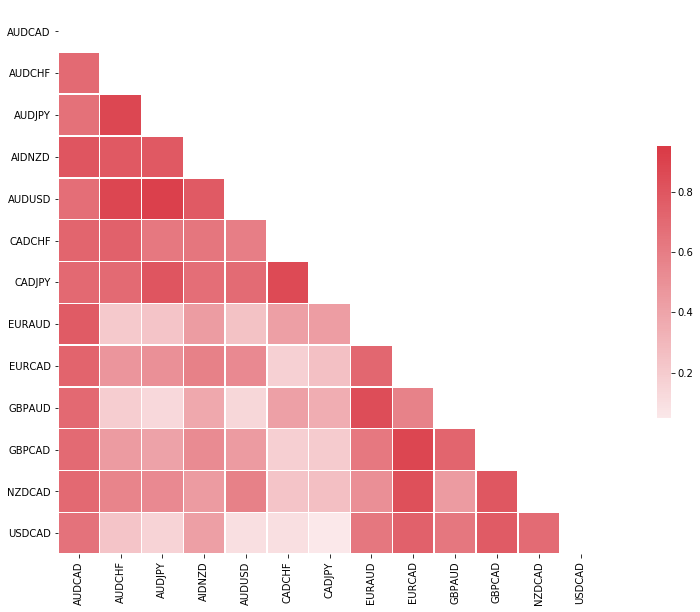

In [148]:
#Матрица Корреляции

import seaborn as sns
corr=data_1.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(20, 10))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.95, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr

In [178]:
data_1=data_1.dropna()
from sklearn.linear_model import LinearRegression
y=data_1.AUDCAD
x=data_1.iloc[:,2:]
X=sm.add_constant(x)
regression=sm.OLS(y,X).fit()
regression.summary()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 AUDCAD   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     7193.
Date:                Sun, 30 Jun 2019   Prob (F-statistic):               0.00
Time:                        20:49:10   Log-Likelihood:                 6841.0
No. Observations:                 730   AIC:                        -1.366e+04
Df Residuals:                     717   BIC:                        -1.360e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.854e-06   7.81e-07      2.374      0.018    3.21e-07    3.39e-06
AUDCHF        -0.0492      0.009     -5.523      0.000      -0.067      -0.032
AUDJPY       -12.2624      1.288     -9.523      0.000     -14.790      -9.734
AIDNZD         0.0368      0.014      2.716      0.007       0.010       0.063
AUDUSD         0.2925      0.010     29.528      0.000       0.273       0.312
CADCHF         0.0814      0.009      9.187      0.000       0.064       0.099
CADJPY        14.1037      1.320     10.687      0.000      11.513      16.695
EURAUD         0.2405      0.028      8.528      0.000       0.185       0.296
EURCAD        -0.1793      0.029     -6.261      0.000      -0.235      -0.123
GBPAUD         0.1200      0.030      4.021      0.000       0.061       0.179
GBPCAD        -0.0926      0.029     -3.166      0.002      -0.150      -0.035
NZDCAD         0.0341      0.010      3.452      0.001       0.015       0.053
USDCAD         0.5477      0.016     33.969      0.000       0.516       0.579
==============================================================================
Omnibus:                      471.184   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            42830.316
Skew:                           2.034   Prob(JB):                         0.00
Kurtosis:                      40.304   Cond. No.                     2.36e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
len(data_1.dropna())


730

(array([  1.,   2.,   7.,  26., 307., 347.,  37.,   1.,   1.,   1.]),
 array([-1.550e-03, -1.243e-03, -9.360e-04, -6.290e-04, -3.220e-04,
        -1.500e-05,  2.920e-04,  5.990e-04,  9.060e-04,  1.213e-03,
         1.520e-03]),
 <a list of 10 Patch objects>)

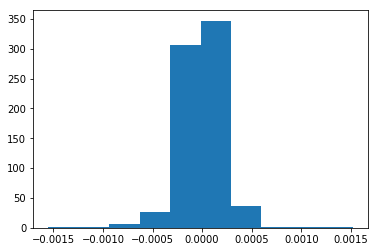

In [51]:
plt.hist(y_test)

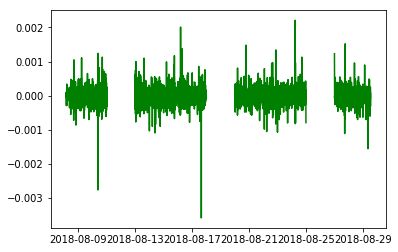

In [76]:
plt.plot(data.Time,data.y,color='green')

In [53]:
Time=data.Time
data = data.set_index(pd.DatetimeIndex(data['Time']))
data.head(5)

,Time,y
Time,,
2018-08-08 03:35:00,2018-08-08 03:35:00,0.00006
2018-08-08 03:40:00,2018-08-08 03:40:00,-0.00002
2018-08-08 03:45:00,2018-08-08 03:45:00,-0.00001
2018-08-08 03:50:00,2018-08-08 03:50:00,0.00009
2018-08-08 03:55:00,2018-08-08 03:55:00,-0.00029


In [0]:
y_train

In [0]:
y=data.y
y_train=y[1398:]+y[:2837]
y_train=y_train.dropna()
y_test=y[5430:]
print("Наличие пропущенных значений в y_test = "+str(any(y_test==None)))
print("Наличие пропущенных значений в y_train = "+str(any(y_train==None)))

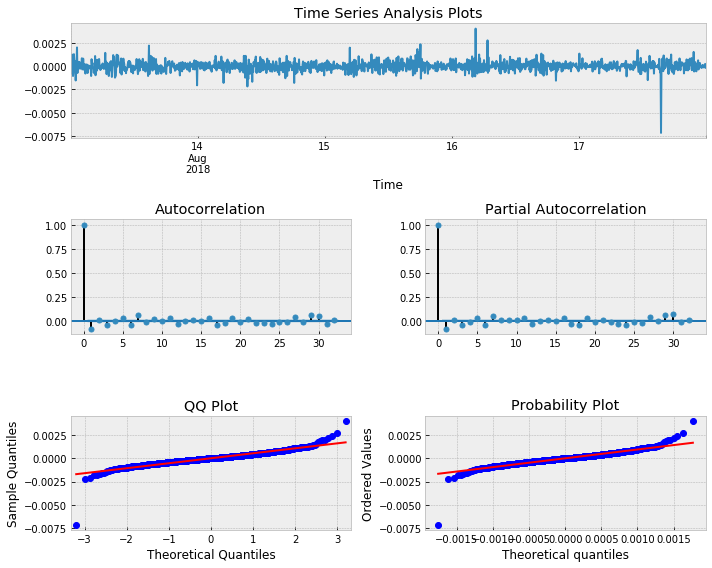

In [72]:
tsplot(y_train)

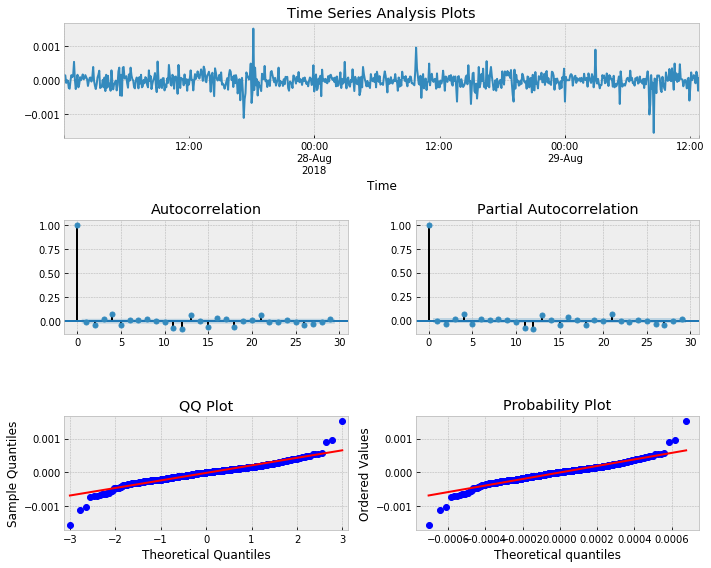

In [56]:
tsplot(y_test)

In [0]:
# data_lagged=data.copy()
# data_lagged['y_lagged_100']=data['y'].shift(+100)
# data_lagged['y_lagged_50']=data['y'].shift(+50)
# data_lagged['y_lagged_10']=data['y'].shift(+10)

In [0]:
# ARIMA model

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

#Function that calls ARIMA model to fit and forecast the data
def StartARIMAForecasting(Actual, P, D, Q):
	model = ARIMA(Actual, order=(P, D, Q))
	model_fit = model.fit(disp=0)
	prediction = model_fit.forecast()[0]
	return prediction
    
#Get exchange rates
ActualData = y_train
#Size of exchange rates
NumberOfElements = len(ActualData)

#Use 70% of data as training, rest 30% to Test model
TrainingSize = int(NumberOfElements * 0.7)
TrainingData = ActualData[0:TrainingSize]
TestData = ActualData[TrainingSize:NumberOfElements]

#new arrays to store actual and predictions
Actual = [x for x in TrainingData]
Predictions = list()


#in a for loop, predict values using ARIMA model
for timepoint in range(len(TestData)):
	ActualValue =  TestData[timepoint]
	#forcast value
	Prediction = StartARIMAForecasting(Actual, 3,1,0)    
	print('Actual=%f, Predicted=%f' % (ActualValue, Prediction))
	#add it in the list
	Predictions.append(Prediction)
	Actual.append(ActualValue)

In [0]:
#Print MSE to see how good the model is
TestData_c=TestData.copy()
Predictions_c=Predictions.copy()
if len(TestData) == len(Predictions):
    Error = mean_squared_error(TestData, Predictions)
    print('Test Mean Squared Error (smaller the better fit): %.3f' % Error)
    # plot
    plt.plot(TestData_c)
    plt.plot(Predictions_c, color='red')
    plt.show()

In [136]:
df_Predictions=pd.Series(v[0] for v in Predictions_c)
TestData_c.append(df_Predictions)

Time
2018-08-16 12:00:00    0.00016
2018-08-16 12:05:00   -0.00008
2018-08-16 12:10:00    0.00054
2018-08-16 12:15:00    0.00000
2018-08-16 12:20:00   -0.00016
2018-08-16 12:25:00   -0.00014
2018-08-16 12:30:00    0.00084
2018-08-16 12:35:00   -0.00008
2018-08-16 12:40:00   -0.00034
2018-08-16 12:45:00    0.00052
2018-08-16 12:50:00    0.00086
2018-08-16 12:55:00   -0.00062
2018-08-16 13:00:00   -0.00038
2018-08-16 13:05:00    0.00024
2018-08-16 13:10:00   -0.00038
2018-08-16 13:15:00    0.00010
2018-08-16 13:20:00   -0.00018
2018-08-16 13:25:00    0.00012
2018-08-16 13:30:00    0.00026
2018-08-16 13:35:00   -0.00002
2018-08-16 13:40:00    0.00024
2018-08-16 13:45:00   -0.00022
2018-08-16 13:50:00   -0.00034
2018-08-16 13:55:00   -0.00032
2018-08-16 14:00:00    0.00040
2018-08-16 14:05:00    0.00080
2018-08-16 14:10:00   -0.00004
2018-08-16 14:15:00    0.00022
2018-08-16 14:20:00    0.00026
2018-08-16 14:25:00    0.00042
                        ...   
2018-08-17 21:30:00    0.00006
201

In [137]:
# GARCH Model
from arch import arch_model
model = arch_model(y_train, mean='Zero', vol='GARCH', p=15)
model_fit=model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:     19,   Neg. LLF: -8807.99999613782
Inequality constraints incompatible    (Exit mode 4)
            Current function value: -8807.999996049137
            Iterations: 1
            Function evaluations: 19
            Gradient evaluations: 1


/usr/local/lib/python3.6/dist-packages/arch/univariate/base.py:577: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:                8808.00
Distribution:                  Normal   AIC:                          -17582.0
Method:            Maximum Likelihood   BIC:                          -17492.4
                                        No. Observations:                 1439
Date:                Sun, Jun 30 2019   Df Residuals:                     1422
Time:                        20:13:54   Df Model:                           17
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      1.4241e-07  4.441e-10    320.705      0.000  [1.415e-07,1.433e-07]
alpha[1]   6.6667e-03  8.992e-02  7.414e-02      0.941      [ -0.170,  0.183]
alpha[2]   6.6667e-03  8.659e-02  7.699e-02      0.939      [ -0.163,  0.176]
alpha[3]   6.6667e-03  3.824e-02      0.174      0.862 [-6.828e-02,8.161e-02]
alpha[4]   6.6667e-03      0.185  3.596e-02      0.971      [ -0.357,  0.370]
alpha[5]   6.6667e-03      0.196  3.406e-02      0.973      [ -0.377,  0.390]
alpha[6]   6.6667e-03  8.959e-02  7.441e-02      0.941      [ -0.169,  0.182]
alpha[7]   6.6667e-03      0.141  4.727e-02      0.962      [ -0.270,  0.283]
alpha[8]   6.6667e-03  7.447e-02  8.952e-02      0.929      [ -0.139,  0.153]
alpha[9]   6.6667e-03  8.680e-02  7.681e-02      0.939      [ -0.163,  0.177]
alpha[10]  6.6667e-03      0.333  2.002e-02      0.984      [ -0.646,  0.659]
alpha[11]  6.6667e-03      0.184  3.621e-02      0.971      [ -0.354,  0.368]
alpha[12]  6.6667e-03      0.215  3.097e-02      0.975      [ -0.415,  0.429]
alpha[13]  6.6667e-03  6.802e-02  9.800e-02      0.922      [ -0.127,  0.140]
alpha[14]  6.6667e-03  7.597e-02  8.775e-02      0.930      [ -0.142,  0.156]
alpha[15]  6.6667e-03      0.526  1.268e-02      0.990      [ -1.024,  1.037]
beta[1]        0.4000      0.256      1.562      0.118      [ -0.102,  0.902]
=============================================================================

Covariance estimator: robust

WARNING: The optimizer did not indicate successful convergence. The message was
Inequality constraints incompatible. See convergence_flag.
"""